In [ ]:
import pandas as pd
weather =pd.read_csv("weatherAUS.csv",index_col="Date")

In [ ]:
null_pct=weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

In [ ]:
valid_columns=weather.columns[null_pct<0.05]


In [ ]:
valid_columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
weather=weather[valid_columns].copy()

In [ ]:
weather.columns=weather.columns.str.lower()
weather.columns

Index(['location', 'mintemp', 'maxtemp', 'rainfall', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [ ]:
weather=weather.ffill()
weather.apply(pd.isnull).sum()

location        0
mintemp         0
maxtemp         0
rainfall        0
winddir3pm      0
windspeed9am    0
windspeed3pm    0
humidity9am     0
humidity3pm     0
temp9am         0
temp3pm         0
raintoday       0
raintomorrow    0
dtype: int64

In [ ]:
weather.index


Index(['2008-12-01', '2008-12-02', '2008-12-03', '2008-12-04', '2008-12-05',
       '2008-12-06', '2008-12-07', '2008-12-08', '2008-12-09', '2008-12-10',
       ...
       '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20',
       '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25'],
      dtype='object', name='Date', length=145460)

In [ ]:
weather.dtypes

location         object
mintemp         float64
maxtemp         float64
rainfall        float64
winddir3pm       object
windspeed9am    float64
windspeed3pm    float64
humidity9am     float64
humidity3pm     float64
temp9am         float64
temp3pm         float64
raintoday        object
raintomorrow     object
dtype: object

We convert our weather dates which are in form of object to date type so that it becomes easier for us to make our model

In [ ]:
weather.index=pd.to_datetime(weather.index)

In [ ]:
weather.index

DatetimeIndex(['2008-12-01', '2008-12-02', '2008-12-03', '2008-12-04',
               '2008-12-05', '2008-12-06', '2008-12-07', '2008-12-08',
               '2008-12-09', '2008-12-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=145460, freq=None)

In [ ]:
weather.index.year

Int64Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=145460)

In [ ]:
weather

,location,mintemp,maxtemp,rainfall,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,temp9am,temp3pm,raintoday,raintomorrow
Date,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,N,13.0,9.0,56.0,21.0,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.9,0.0,WNW,9.0,9.0,53.0,24.0,12.5,26.1,No,No


In [ ]:
weather.index.year.value_counts().sort_index()

2007       61
2008     2270
2009    16789
2010    16782
2011    15407
2012    15409
2013    16415
2014    17885
2015    17885
2016    17934
2017     8623
Name: Date, dtype: int64

we make a new target column that contains tmax temp of next day. Logic is temperature of today and tomorrow are somewhat equal and we can use that to predict temperature.

In [ ]:
weather["target"]=weather.shift(-1)["maxtemp"]
weather

,location,mintemp,maxtemp,rainfall,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,temp9am,temp3pm,raintoday,raintomorrow,target
Date,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No,25.1
2008-12-02,Albury,7.4,25.1,0.0,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No,25.7
2008-12-03,Albury,12.9,25.7,0.0,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No,28.0
2008-12-04,Albury,9.2,28.0,0.0,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No,32.3
2008-12-05,Albury,17.5,32.3,1.0,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,No,25.3
2017-06-22,Uluru,3.6,25.3,0.0,N,13.0,9.0,56.0,21.0,10.9,24.5,No,No,26.9
2017-06-23,Uluru,5.4,26.9,0.0,WNW,9.0,9.0,53.0,24.0,12.5,26.1,No,No,27.0


In [ ]:
weather=weather.ffill()
weather

,location,mintemp,maxtemp,rainfall,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,temp9am,temp3pm,raintoday,raintomorrow,target
Date,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No,25.1
2008-12-02,Albury,7.4,25.1,0.0,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No,25.7
2008-12-03,Albury,12.9,25.7,0.0,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No,28.0
2008-12-04,Albury,9.2,28.0,0.0,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No,32.3
2008-12-05,Albury,17.5,32.3,1.0,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,No,25.3
2017-06-22,Uluru,3.6,25.3,0.0,N,13.0,9.0,56.0,21.0,10.9,24.5,No,No,26.9
2017-06-23,Uluru,5.4,26.9,0.0,WNW,9.0,9.0,53.0,24.0,12.5,26.1,No,No,27.0


In [ ]:
weather.corr()

<ipython-input-35-7abb8bc3d4be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr()


,mintemp,maxtemp,rainfall,windspeed9am,windspeed3pm,humidity9am,humidity3pm,temp9am,temp3pm,target
mintemp,1.000000,0.736463,0.101184,0.172784,0.173285,-0.228294,-0.003402,0.901971,0.707722,0.673412
maxtemp,0.736463,1.000000,-0.074576,0.013097,0.046092,-0.492027,-0.504305,0.887200,0.979596,0.875182
rainfall,0.101184,-0.074576,1.000000,0.085024,0.055817,0.219602,0.244052,0.008497,-0.076693,-0.050368
windspeed9am,0.172784,0.013097,0.085024,1.000000,0.486738,-0.264832,-0.023669,0.125297,-0.001168,0.003239
windspeed3pm,0.173285,0.046092,0.055817,0.486738,1.000000,-0.128569,0.007613,0.158054,0.021674,-0.016322
humidity9am,-0.228294,-0.492027,0.219602,-0.264832,-0.128569,1.000000,0.659650,-0.462831,-0.483622,-0.423050
humidity3pm,-0.003402,-0.504305,0.244052,-0.023669,0.007613,0.659650,1.000000,-0.228113,-0.557481,-0.433855
temp9am,0.901971,0.887200,0.008497,0.125297,0.158054,-0.462831,-0.228113,1.000000,0.858189,0.791365
temp3pm,0.707722,0.979596,-0.076693,-0.001168,0.021674,-0.483622,-0.557481,0.858189,1.000000,0.871807
target,0.673412,0.875182,-0.050368,0.003239,-0.016322,-0.423050,-0.433855,0.791365,0.871807,1.000000


we use ridge regression that helps in removing collinearity that is a problem in normal linear regression.

In [ ]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=.1)


alpha controls how much coefficients are shrunk to account for collinearity

In [ ]:
predictor=weather.columns[~weather.columns.isin(["target","winddir3pm","location","raintoday","raintomorrow"])]


predictors are columns that we used to predict our data.

In [ ]:
predictor

Index(['mintemp', 'maxtemp', 'rainfall', 'windspeed9am', 'windspeed3pm',
       'humidity9am', 'humidity3pm', 'temp9am', 'temp3pm'],
      dtype='object')

here we have time-series data so we cannot use cross-validation time series data means tomorrow data is simmiliar to today's data only. We dont use future data to predict the past data.

In [ ]:
def backtest(weather,model,predictor,start=3650,step=90):
  all_preds=[]
  for i in range(start,weather.shape[0],step):

    train=weather.iloc[:i,:]
    test=weather.iloc[i:(i+step),:]

    model.fit(train[predictor],train["target"])

    preds=model.predict(test[predictor])
    preds=pd.Series(preds,index=test.index)

    combined=pd.concat([test["target"],preds],axis=1)

    combined.columns=["actual","prediction"]

    combined["diff"]=(combined["prediction"]-combined["actual"]).abs()

    all_preds.append(combined)
  return pd.concat(all_preds)



In [ ]:
predictions=backtest(weather,rr,predictor)

In [ ]:
predictions

,actual,prediction,diff
Date,,,
2010-09-03,19.9,17.945674,1.954326
2010-09-04,20.3,18.810440,1.489560
2010-09-05,20.4,20.485476,0.085476
2010-09-06,17.8,20.496095,2.696095
2010-09-07,18.9,18.158363,0.741637
...,...,...,...
2017-06-21,25.3,23.028862,2.271138
2017-06-22,26.9,24.821608,2.078392
2017-06-23,27.0,26.293624,0.706376


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"],predictions["prediction"])

2.4200023112238545

or you could do

In [ ]:
predictions["diff"].mean()

2.4200023112238545

In [ ]:
pred2=predictions.iloc[:,:-1]

In [ ]:
pred2

,actual,prediction
Date,,
2010-09-03,19.9,17.945674
2010-09-04,20.3,18.810440
2010-09-05,20.4,20.485476
2010-09-06,17.8,20.496095
2010-09-07,18.9,18.158363
...,...,...
2017-06-21,25.3,23.028862
2017-06-22,26.9,24.821608
2017-06-23,27.0,26.293624


<Axes: xlabel='Date'>

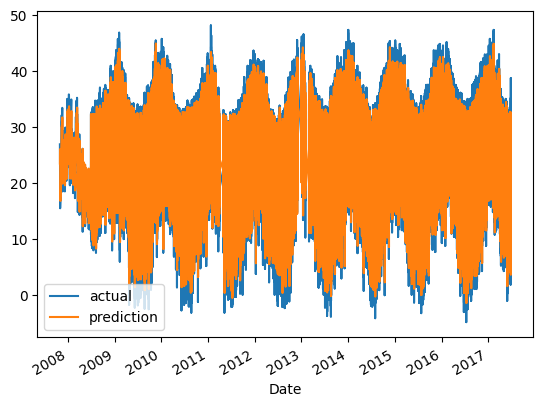

In [ ]:
pred2.plot()